<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:28px; border-radius:8px; box-shadow:0 2px 8px #00004733;" src='alinco.png' width="120"/>
<div style="margin-left:150px;">
<h1 style="color:#000047; font-size:2.3em; margin-bottom:0;">Actividad 2</h1>
<h2 style="color:#003366; font-size:1.3em; margin-top:0;">Identificación, Preprocesamiento y Distribución de los datos</h2>
</div>
<br style="clear:both"/>
</div>



<div style="border-left:6px solid #000047; padding:18px; margin-top:18px; background:#f5f5f5; border-radius:8px;">
<span style="font-size:1.1em;"><b>Objetivo:</b>
Practicar los métodos vistos en clase para la identificación de datos faltantes, outliers y análisis de la distribución de los datos, utilizando herramientas estadísticas y visuales modernas.</span>
<ul style="margin-top:10px;">
<li>Aplicar técnicas de análisis exploratorio de datos (EDA) para comprender la calidad y forma de los datos.</li>
<li>Identificar y tratar valores atípicos (outliers) tanto univariados como multivariados.</li>
<li>Visualizar y comparar distribuciones para tomar mejores decisiones en el preprocesamiento.</li>
</ul>
</div>

<div style="margin-top:18px; background:#f0f7ff; border-radius:8px; padding:14px; border:1px solid #b3c6ff;">
<b>Instrucciones generales:</b>
<ul style="margin-bottom:0;">
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>la librería creada (HyAIA) en clase</b> para contestar lo que se pide.</li>
<li>Incluye comentarios y conclusiones breves en cada sección para reflexionar sobre los resultados obtenidos.</li>
<li>Recuerda que puedes agregar celdas de código o markdown adicionales si lo consideras necesario para explicar tu proceso.</li>
</ul>
</div>

<div style="margin-top:18px; background:#fffbe6; border-radius:8px; padding:12px; border:1px solid #ffe066;">
<b>Tip:</b> Aprovecha las funciones de visualización para interpretar mejor los resultados y justificar tus respuestas.
</div>

<h2 style="color:#003366; margin-top:0;">1. Medidas de posición y de forma <span style='font-size:0.7em; color:#888;'>&#128202;</span></h2>
<p style="font-size:1.1em;">
En esta sección analizarás el <b>dataset <code>tips</code> de la librería <code>seaborn</code></b> para practicar el análisis de calidad, distribución y forma de los datos.
</p>
<ul style="font-size:1.05em;">
<li><b>1.</b> <span style='color:#000047;'>Carga el dataset:</span> <code>sns.load_dataset('tips')</code></li>
<li><b>2.</b> <span style='color:#000047;'>Reporte de calidad:</span> Usa <code>dqr()</code> para obtener un resumen de los datos.</li>
<li><b>3.</b> <span style='color:#000047;'>Asimetría y curtósis:</span> Calcula estos valores para cada columna numérica.</li>
<li><b>4.</b> <span style='color:#000047;'>Visualización:</span> Grafica la distribución y medidas de forma de <code>total_bill</code>.</li>
<li><b>5.</b> <span style='color:#000047;'>Comparación por día:</span> Compara asimetría y curtósis de <code>total_bill</code> por <code>day</code>.</li>
<li><b>6.</b> <span style='color:#000047;'>Cuartiles:</span> Calcula los cuartiles de <code>tip</code>.</li>
<li><b>7.</b> <span style='color:#000047;'>Diagrama de cajas:</span> Visualiza <code>tip</code> y comenta tus observaciones.</li>
</ul>
<div style="margin-top:12px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Consejo:</b> Utiliza gráficos como histogramas, boxplots y tablas resumen para enriquecer tu análisis.
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reinstall beautifulsoup4 and soupsieve to fix compatibility issues
!pip uninstall beautifulsoup4 soupsieve -y
!pip install beautifulsoup4 soupsieve

codigo_hyaia = """
import pandas as pd
import numpy as np
import string

class HyAIA:
    def __init__(self, df):
        self.data = df
        self.columns = df.columns
        self.data_binarios, self.binarios_columns = self.get_binarios()
        self.data_cuantitativos, self.cuantitativos_columns = self.get_cuantitativos()
        self.data_categoricos, self.categoricos_columns = self.get_categoricos()
        self.df_dqr = self.get_dqr()

    def get_binarios(self):
        col_bin = []
        for col in self.data.columns:
            if self.data[col].nunique() == 2:
                col_bin.append(col)
        return self.data[col_bin], col_bin

    def get_cuantitativos(self):
        col_cuantitativas = self.data.select_dtypes(include='number').columns
        return self.data[col_cuantitativas], col_cuantitativas

    def get_categoricos(self):
        col_categoricos = self.data.select_dtypes(exclude='number').columns
        col_cat = []
        for col in col_categoricos:
            if self.data[col].nunique()>2:
                col_cat.append(col)
        return self.data[col_cat], col_cat

    def get_dqr(self):
        columns = pd.DataFrame(list(self.data.columns.values), columns=['Columns_Names'], index=list(self.data.columns.values))
        data_dtypes = pd.DataFrame(self.data.dtypes, columns=['Dtypes'])
        present_values = pd.DataFrame(self.data.count(), columns=['Present_values'])
        missing_values = pd.DataFrame(self.data.isnull().sum(), columns=['Missing_values'])
        unique_values = pd.DataFrame(columns=['Unique_values'])
        for col in list(self.data.columns.values):
            unique_values.loc[col] = [self.data[col].nunique()]
        max_values = pd.DataFrame(columns=['Max_values'])
        min_values = pd.DataFrame(columns=['Min_values'])
        for col in list(self.data.columns.values):
            try:
                max_values.loc[col] = [self.data[col].max()]
                min_values.loc[col] = [self.data[col].min()]
            except:
                pass
        return columns.join(data_dtypes).join(present_values).join(missing_values).join(unique_values).join(max_values).join(min_values)
"""
with open('HyAIA.py', 'w') as f:
    f.write(codigo_hyaia)
print(" Archivo 'HyAIA.py' creado exitosamente.")

id_credit = '19dZnyQcZzrQMkGWKETd-577r_SAN-Vfv'
id_salaries = '1Qjt_Hw3jfMb3GF4ZhL_mXbLS6UpPgvv4'

print("\nDescargando archivos...")
if not os.path.exists('credit_card.csv'):
    gdown.download(f'https://drive.google.com/uc?id={id_credit}', 'credit_card.csv', quiet=False)

if not os.path.exists('ds_salaries.csv'):
    gdown.download(f'https://drive.google.com/uc?id={id_salaries}', 'ds_salaries.csv', quiet=False)

import HyAIA as hya
print("\n Librería importada y archivos listos.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found existing installation: beautifulsoup4 4.14.3
Uninstalling beautifulsoup4-4.14.3:
  Successfully uninstalled beautifulsoup4-4.14.3
Found existing installation: soupsieve 2.8
Uninstalling soupsieve-2.8:
  Successfully uninstalled soupsieve-2.8
  Using cached beautifulsoup4-4.14.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.14.3-py3-none-any.whl (107 kB)
Using cached soupsieve-2.8-py3-none-any.whl (36 kB)


 Archivo 'HyAIA.py' creado exitosamente.

Descargando archivos...

 Librería importada y archivos listos.


--- Reporte de Calidad de Datos (DQR - Tips) ---


,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values
total_bill,total_bill,float64,244,0,229,50.81,3.07
tip,tip,float64,244,0,123,10.00,1.00
sex,sex,category,244,0,2,NaN,NaN
smoker,smoker,category,244,0,2,NaN,NaN
day,day,category,244,0,4,NaN,NaN
time,time,category,244,0,2,NaN,NaN
size,size,int64,244,0,6,6.00,1.00



--- Asimetría (Skewness) ---
total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

--- Curtosis (Kurtosis) ---
total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64


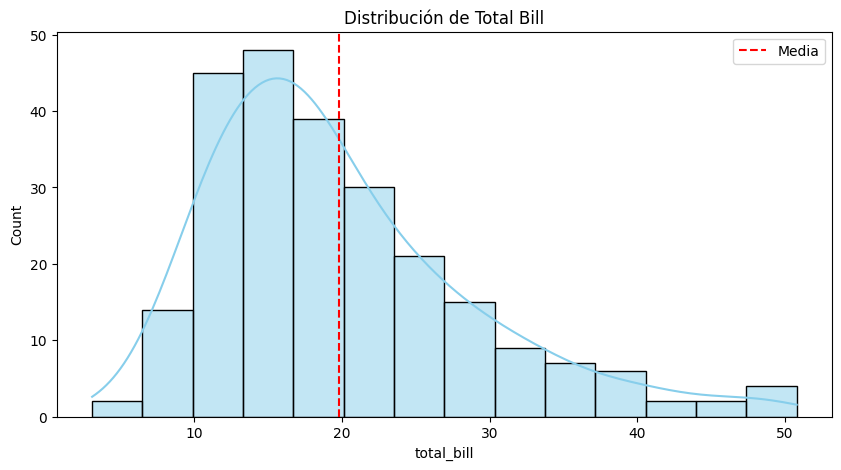


--- Comparación por Día (Curtosis y Asimetría) ---


,skew,kurtosis
day,,
Thur,1.360770,1.819974
Fri,1.316759,1.994452
Sat,1.262112,1.715632
Sun,0.823085,0.422241


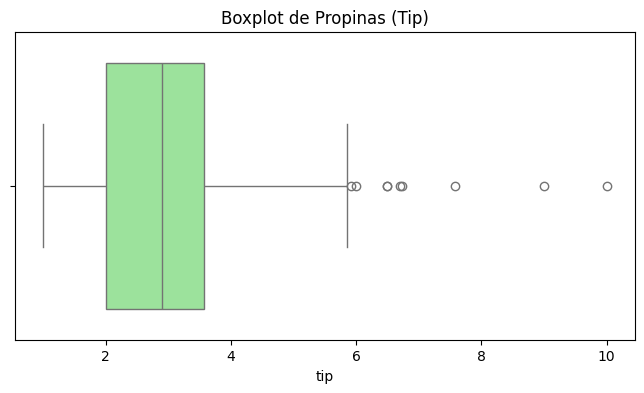

In [2]:

df_tips = sns.load_dataset('tips')

print("--- Reporte de Calidad de Datos (DQR - Tips) ---")
analisis_tips = hya.HyAIA(df_tips)
display(analisis_tips.df_dqr)

df_cuant, _ = analisis_tips.get_cuantitativos()

print("\n--- Asimetría (Skewness) ---")
print(df_cuant.skew())
print("\n--- Curtosis (Kurtosis) ---")
print(df_cuant.kurtosis())

plt.figure(figsize=(10, 5))
sns.histplot(data=df_tips, x='total_bill', kde=True, color='skyblue')
plt.title('Distribución de Total Bill')
plt.axvline(df_tips['total_bill'].mean(), color='red', linestyle='--', label='Media')
plt.legend()
plt.show()

print("\n--- Comparación por Día (Curtosis y Asimetría) ---")
display(df_tips.groupby('day', observed=True)['total_bill'].agg(['skew', lambda x: x.kurt()]).rename(columns={'<lambda_0>': 'kurtosis'}))

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_tips['tip'], color='lightgreen')
plt.title('Boxplot de Propinas (Tip)')
plt.show()

<h2 style="color:#b36b00; margin-top:0;">2. Datos Atípicos (Outliers) <span style='font-size:0.7em; color:#888;'>&#9888;&#65039;</span></h2>
<p style="font-size:1.1em;">
En este apartado identificarás y analizarás <b>outliers univariados y multivariados</b> usando diferentes datasets y técnicas.
</p>
<div style="background:#fff2cc; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px; margin-bottom:10px;">
<b>Univariado:</b> <br>
Utiliza el dataset <code>ds_salaries.csv</code> (en la misma ruta que este notebook).
<ol style="font-size:1.05em;">
<li><b>Análisis exploratorio:</b> Visualiza la distribución y diagramas de caja de cada variable. Agrega comentarios sobre tus hallazgos.</li>
<li><b>Identificación de outliers:</b> Aplica métodos vistos en clase según la distribución de cada variable.</li>
</ol>
</div>
<div style="background:#ffe6e6; border-left:4px solid #b30000; padding:10px 18px; border-radius:8px;">
<b>Multivariado:</b> <br>
Descarga y utiliza el dataset <a href="https://drive.google.com/file/d/19dZnyQcZzrQMkGWKETd-577r_SAN-Vfv/view?usp=drive_link" target="_blank"><code>credit_card.csv</code></a>.
<ol style="font-size:1.05em;">
<li><b>Identificación de outliers multivariados:</b> Aplica técnicas multivariadas vistas en clase para detectar valores atípicos.</li>
</ol>
</div>



   ANÁLISIS UNIVARIADO: SALARIOS


,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values
work_year,work_year,int64,3755,0,4,2023,2020
experience_level,experience_level,object,3755,0,4,SE,EN
employment_type,employment_type,object,3755,0,4,PT,CT
job_title,job_title,object,3755,0,93,Staff Data Scientist,3D Computer Vision Researcher
salary,salary,int64,3755,0,815,30400000,6000


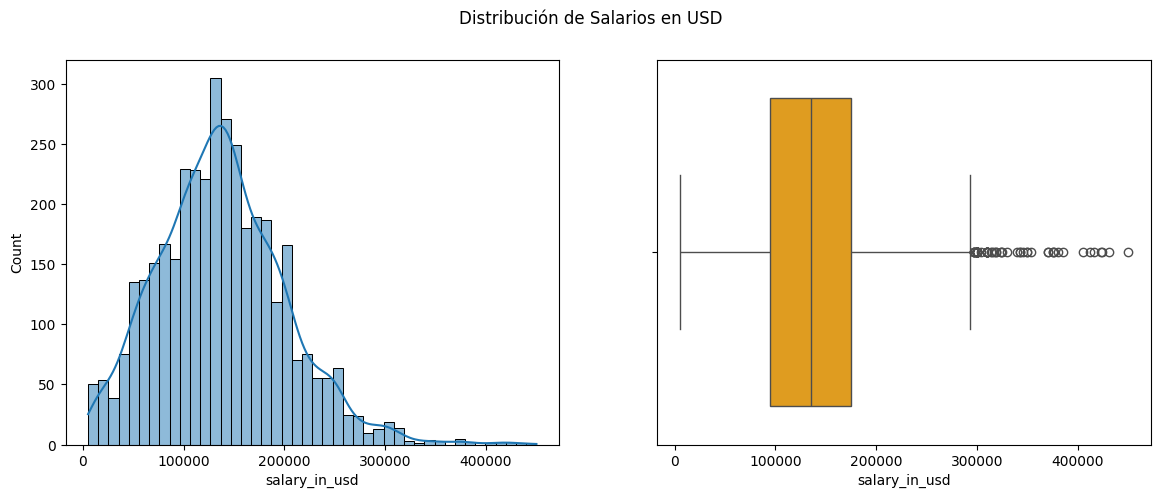

Rango IQR: 95000.0 - 175000.0
Límites para outliers: < -25000.0 o > 295000.0
Total outliers detectados: 63

   ANÁLISIS MULTIVARIADO: CRÉDITO
Algoritmo: Isolation Forest
Transacciones anómalas detectadas: 2849
Graficando columnas: Time vs V1


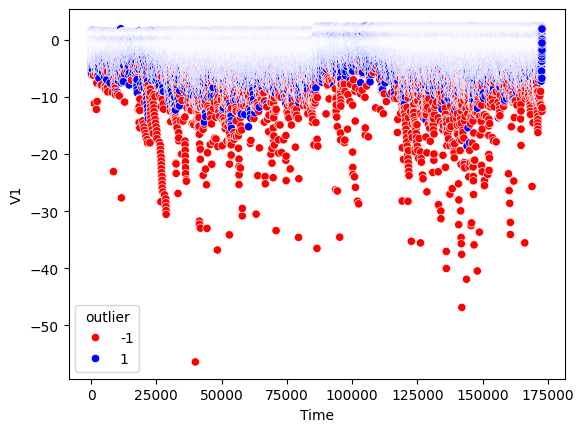

In [3]:
from sklearn.ensemble import IsolationForest

print("\n" + "="*40 + "\n   ANÁLISIS UNIVARIADO: SALARIOS\n" + "="*40)

if os.path.exists('ds_salaries.csv'):
    df_salaries = pd.read_csv('ds_salaries.csv')
    var_salario = 'salary_in_usd'

    analisis_salaries = hya.HyAIA(df_salaries)
    display(analisis_salaries.df_dqr.head())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df_salaries[var_salario], kde=True, ax=axes[0])
    sns.boxplot(x=df_salaries[var_salario], ax=axes[1], color='orange')
    plt.suptitle('Distribución de Salarios en USD')
    plt.show()

    Q1 = df_salaries[var_salario].quantile(0.25)
    Q3 = df_salaries[var_salario].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    outliers = df_salaries[(df_salaries[var_salario] < lim_inf) | (df_salaries[var_salario] > lim_sup)]
    print(f"Rango IQR: {Q1} - {Q3}")
    print(f"Límites para outliers: < {lim_inf} o > {lim_sup}")
    print(f"Total outliers detectados: {len(outliers)}")
else:
    print(" Error: No se encontró ds_salaries.csv")

print("\n" + "="*40 + "\n   ANÁLISIS MULTIVARIADO: CRÉDITO\n" + "="*40)

if os.path.exists('credit_card.csv'):
    df_credit = pd.read_csv('credit_card.csv')

    analisis_credit = hya.HyAIA(df_credit)
    df_multi, _ = analisis_credit.get_cuantitativos()
    df_multi = df_multi.dropna()

    iso = IsolationForest(contamination=0.01, random_state=42)
    df_multi['outlier'] = iso.fit_predict(df_multi)

    n_outliers = (df_multi['outlier'] == -1).sum()
    print(f"Algoritmo: Isolation Forest")
    print(f"Transacciones anómalas detectadas: {n_outliers}")

    cols = df_multi.columns
    if 'Age' in cols and 'Credit amount' in cols:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_multi, x='Age', y='Credit amount', hue='outlier', palette={1:'blue', -1:'red'})
        plt.title('Detección de Anomalías (Rojo = Outlier)')
        plt.show()
    else:
        print(f"Graficando columnas: {cols[0]} vs {cols[1]}")
        sns.scatterplot(data=df_multi, x=cols[0], y=cols[1], hue='outlier', palette={1:'blue', -1:'red'})
        plt.show()

else:
    print(" Error: No se encontró credit_card.csv")